## Necessary Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.optimize import fmin

## Define Class

In [2]:
class potential_function:
    def __init__(self, initial_data, sigma):
        self.initial_data = initial_data
        self.sigma = sigma
    
    def parzen(self,x):
        temp = 0
        for i in self.initial_data:
            temp += np.e**(-(np.dot(x-i,x-i))*(1/(2*self.sigma**2)))
        return temp

    def value(self,x):
        temp = 0
        for i in self.initial_data:
            temp +=(np.dot(x-i,x-i))*np.e**(-(np.dot(x-i,x-i))*(1/(2*self.sigma**2)))
        temp = (1/(2*self.sigma**2))*(1/self.parzen(x))*temp
        return temp

## 1D Synthetic Data

In [3]:
X_1 = np.random.randn(50)-3
X_2 = np.random.randn(50)+3
X_total = np.concatenate((X_1, X_2))
y_zero = np.zeros(50)
X_lin = np.linspace(-6,6,100)
potential_1d = potential_function(X_total,1)
values = [potential_1d.value(i) for i in X_lin]
center_1 = fmin(potential_1d.value,np.array(-1))
center_2 = fmin(potential_1d.value,np.array(1))
print(center_1,center_2)

Optimization terminated successfully.
         Current function value: 0.202711
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 0.240382
         Iterations: 18
         Function evaluations: 36
[-2.81708984] [2.7765625]


## Plot Graph With Minimum

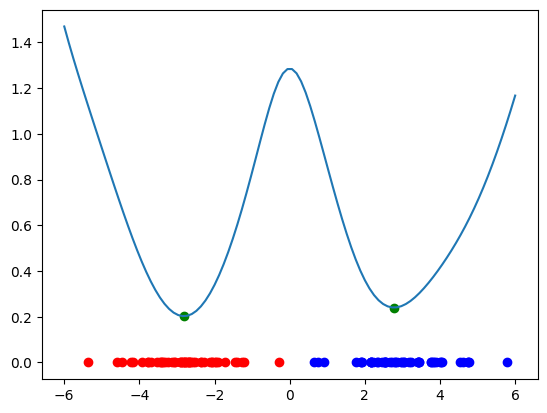

In [4]:
plt.figure
plt.scatter(X_1,y_zero, c = 'red')
plt.scatter(X_2,y_zero, c = 'blue')
plt.plot(X_lin,values)
plt.scatter(center_1,potential_1d.value(center_1), c = 'green')
plt.scatter(center_2,potential_1d.value(center_2), c = 'green')
plt.show()

## 2D Synthetic Data

In [5]:
cov = [[1,0],[0,1]]
X_1 = np.random.multivariate_normal([-2,-2],cov, size = 100)
X_2 = np.random.multivariate_normal([2,2],cov, size = 100)
X_total = np.concatenate((X_1, X_2))
potential_2d = potential_function(X_total,1)
center_1 = fmin(potential_2d.value,np.array([-1,-1]))
center_2 = fmin(potential_2d.value,np.array([1,1]))
print(center_1,center_2)

Optimization terminated successfully.
         Current function value: 0.552262
         Iterations: 43
         Function evaluations: 82
Optimization terminated successfully.
         Current function value: 0.488088
         Iterations: 38
         Function evaluations: 74
[-2.44694854 -1.64072719] [2.16676202 2.1168522 ]


## Plot With Minimum

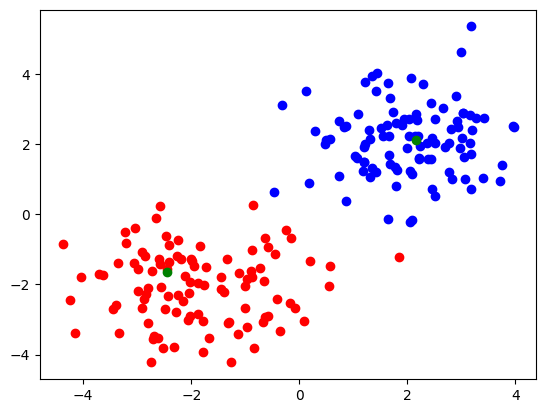

In [6]:
plt.scatter(X_1[:, 0], X_1[:, 1], c ='red')
plt.scatter(X_2[:, 0], X_2[:, 1], c = 'blue')
plt.scatter(center_1[0],center_1[1], c = 'green')
plt.scatter(center_2[0],center_2[1], c = 'green')
plt.show()

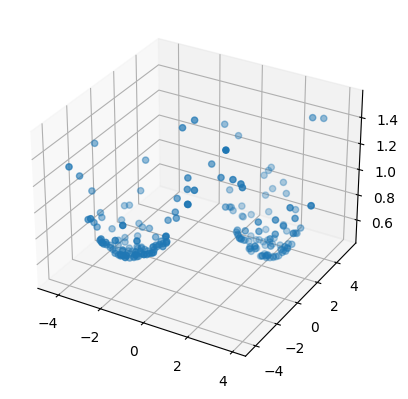

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
values = [potential_2d.value(i) for i in X_total]
ax.scatter(X_total[:,0], X_total[:,1], values, 'gray')
plt.show()